In [1]:
#emg is already preprocessed in read_excel_emg.py

# Label sets and reps

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


imu = pd.read_pickle("data/out/df_correct_reps.pkl")
emg = pd.read_pickle("data/out/emg_correct.pkl")
fs = 2000

# Merge the IMU and EMG data on the Frame column to add the Set and Rep columns to the EMG data
emg = emg.merge(imu[['Frame', 'Participant', 'Set', 'Repetition']], on=['Frame', 'Participant'], how='left')
emg = emg.dropna(subset=['Repetition', 'Set'])
print("emg with sets and reps ", emg.head())
emg['Time'] = emg['Sample'] / fs
emg['Time_per_set'] = emg.groupby(['Participant', 'Set'])['Time'].transform(lambda x: x - x.min())
emg['Time_per_rep'] = emg.groupby(['Participant', 'Set', 'Repetition'])['Time'].transform(lambda x: x - x.min())
print("done with correct")
emg.to_pickle("data/out/emg_correct_with_set_rep.pkl")

#for incorrect files
imu2 = pd.read_pickle("data/out/df_incorrect_reps.pkl")
emg2 = pd.read_pickle("data/out/emg_incorrect.pkl")

emg2 = emg2.merge(imu2[['Frame', 'Participant', 'Set', 'Repetition']], on=['Frame', 'Participant'], how='left')
emg2 = emg2.dropna(subset=['Repetition', 'Set'])
print("emg with sets and reps ", emg2.head())
emg2['Time'] = emg2['Sample'] / fs
emg2['Time_per_set'] = emg2.groupby(['Participant', 'Set'])['Time'].transform(lambda x: x - x.min())
emg2['Time_per_rep'] = emg2.groupby(['Participant', 'Set', 'Repetition'])['Time'].transform(lambda x: x - x.min())
print("done with incorrect")
emg2.to_pickle("data/out/emg_incorrect_with_set_rep.pkl")

emg with sets and reps        Frame  Sample  middle delt  trapezius  front delt  middle delt filtered  \
8663    260    8663    -7.351685   5.438232  -46.224976              0.001065   
8664    260    8664    -5.941772   3.927612  -35.751343              0.001063   
8665    260    8665    -7.150269  -1.007080  -26.989746              0.000432   
8666    260    8666    -9.567261   1.007080  -27.191162              0.000797   
8667    260    8667   -12.084961  -8.560181  -26.284790              0.001996   

      middle delt envelope  trapezius filtered  trapezius envelope  \
8663              9.909707            0.003215            9.216446   
8664              9.935390            0.003176            9.218151   
8665              9.962301            0.002487            9.220271   
8666              9.990464            0.001526            9.222810   
8667             10.019898            0.000670            9.225768   

      front delt filtered  front delt envelope    Participant  Set  

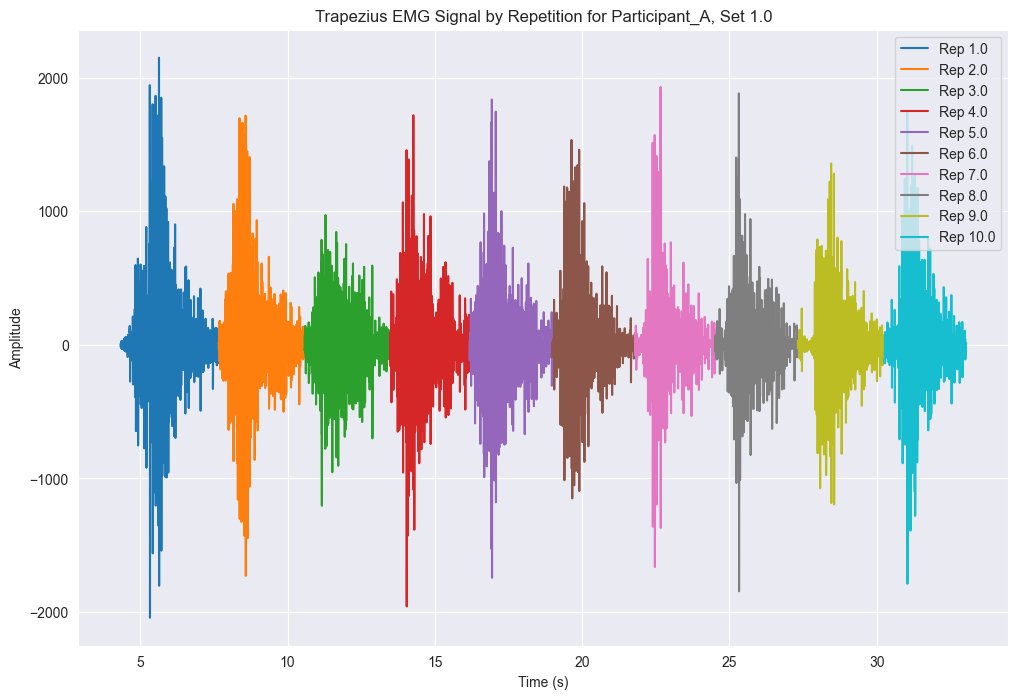

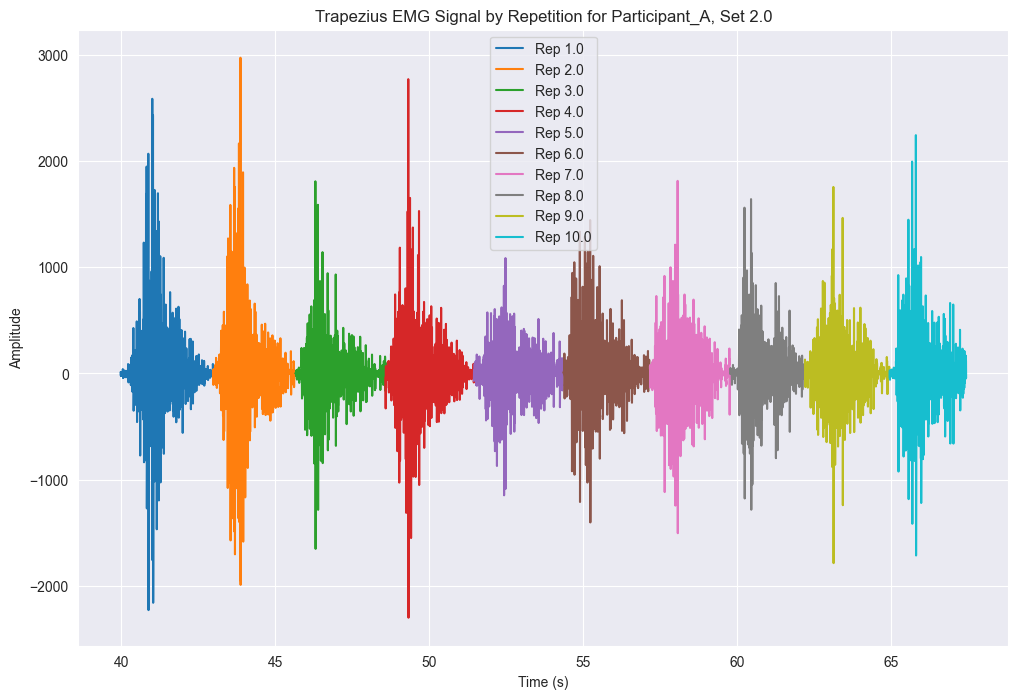

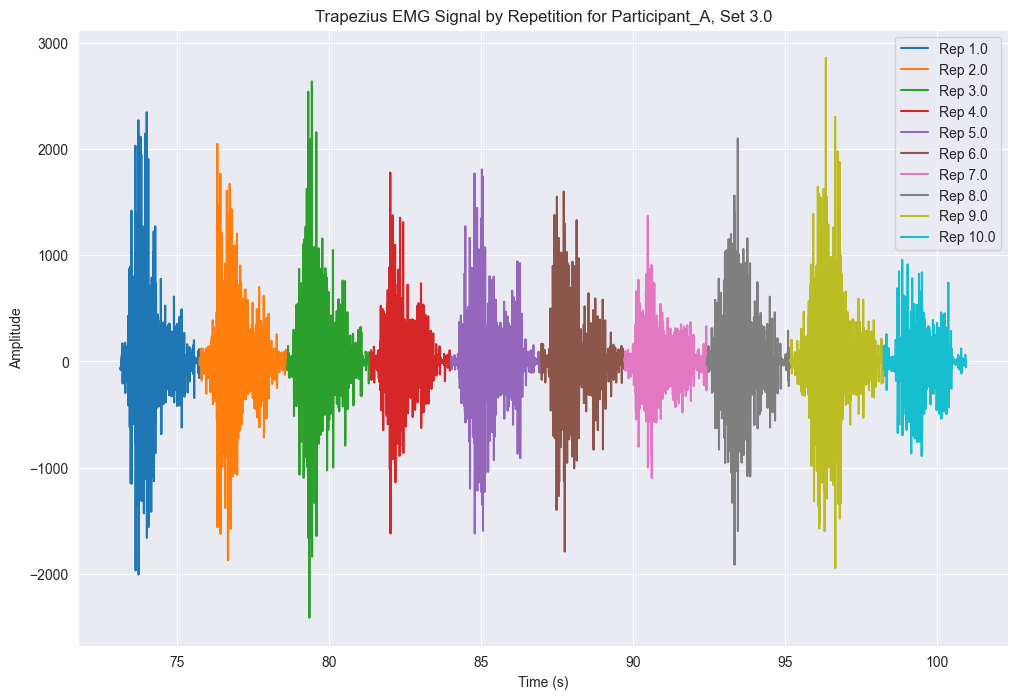

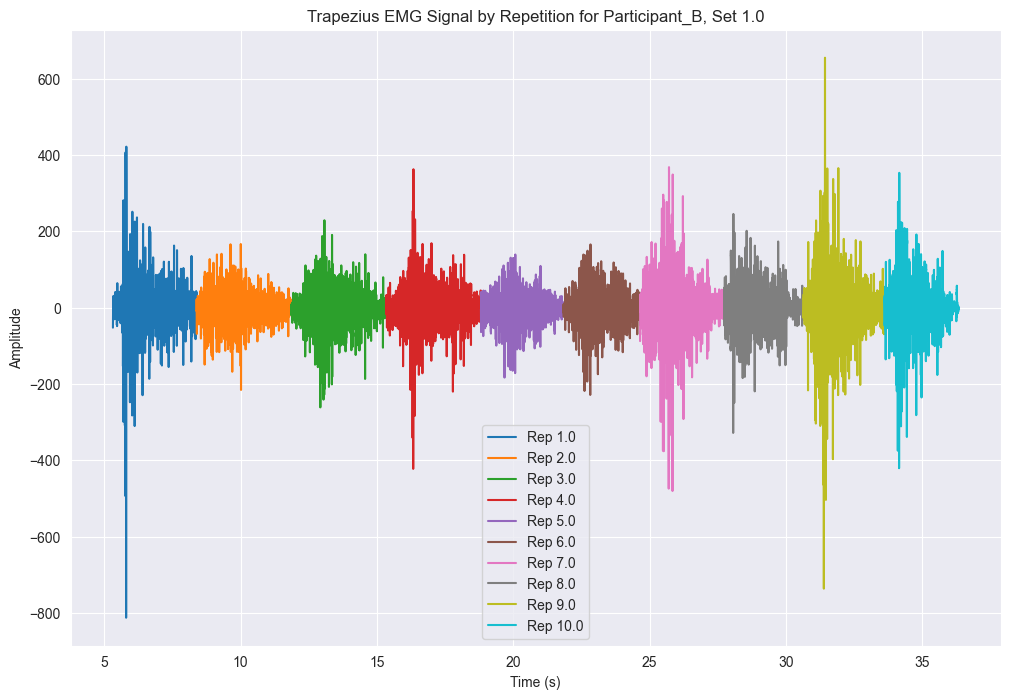

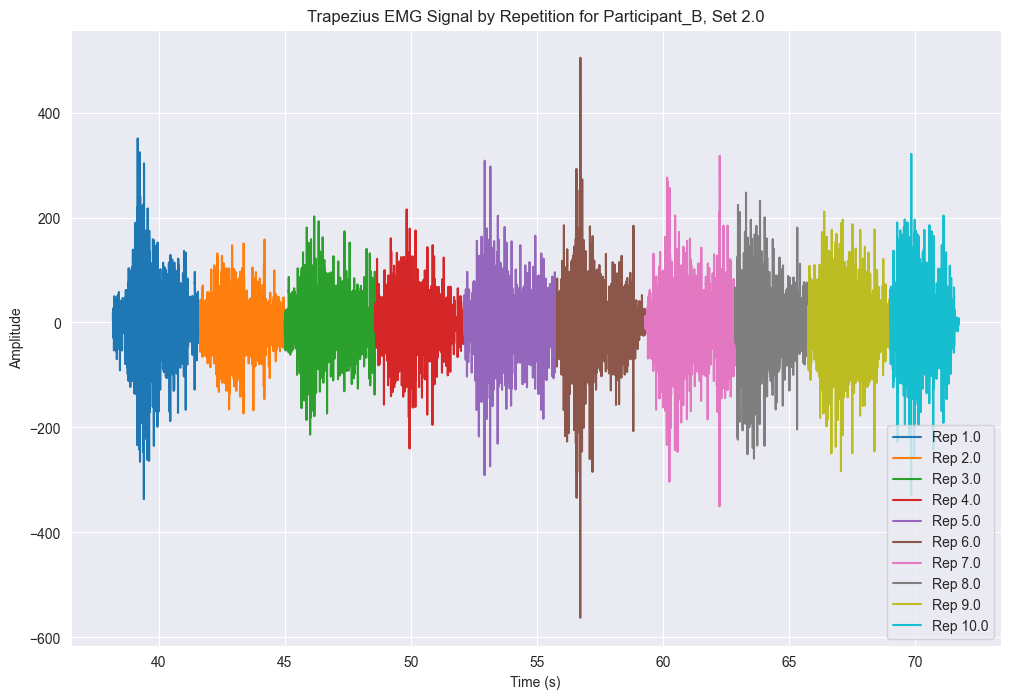

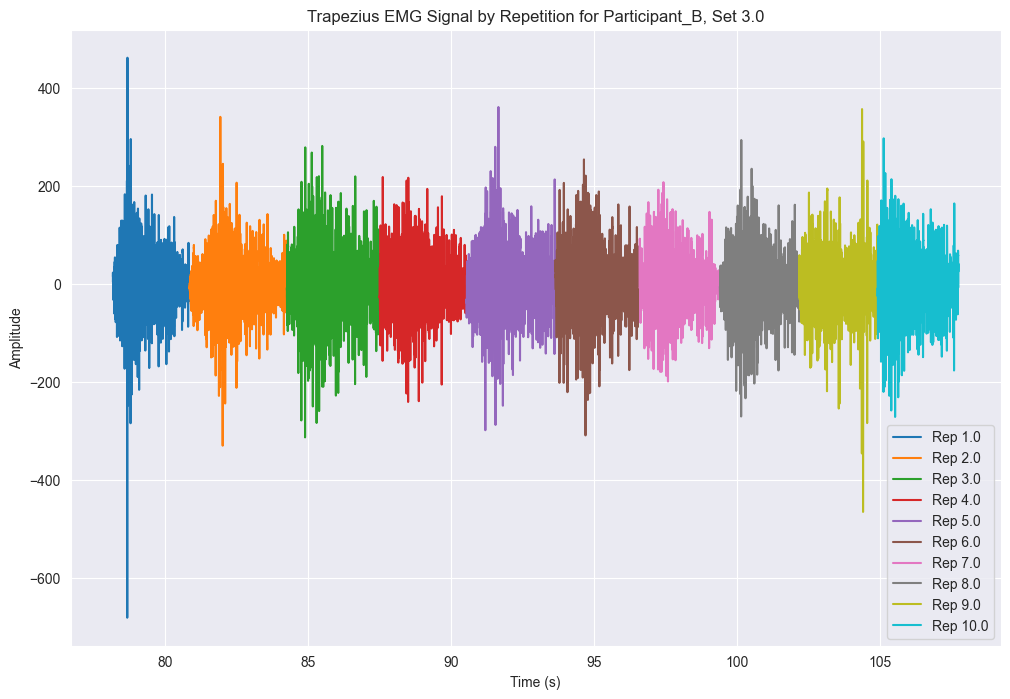

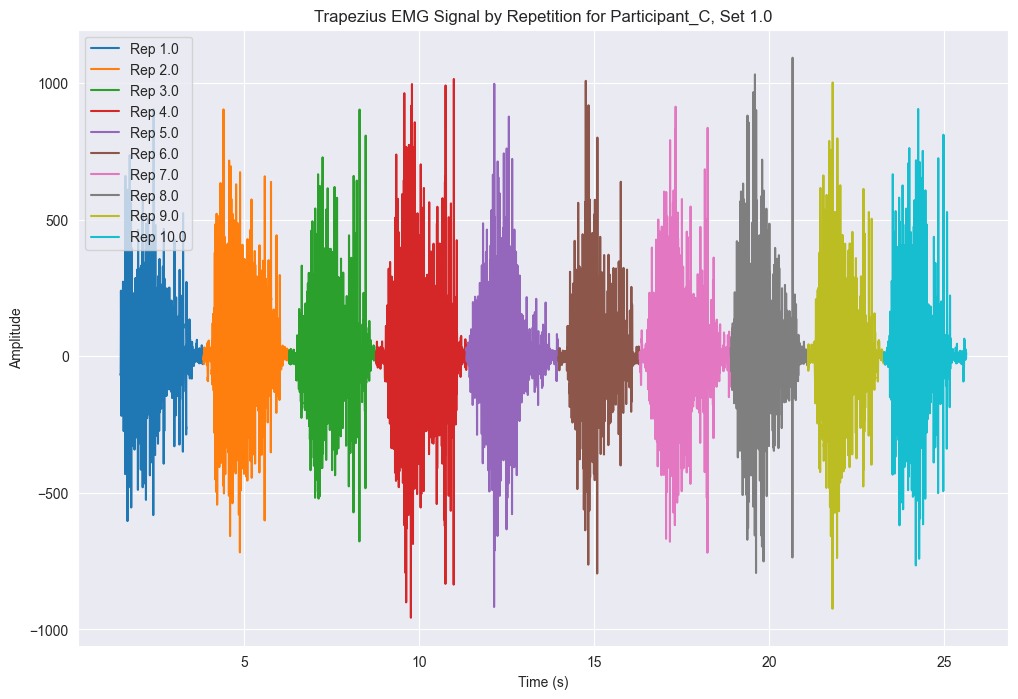

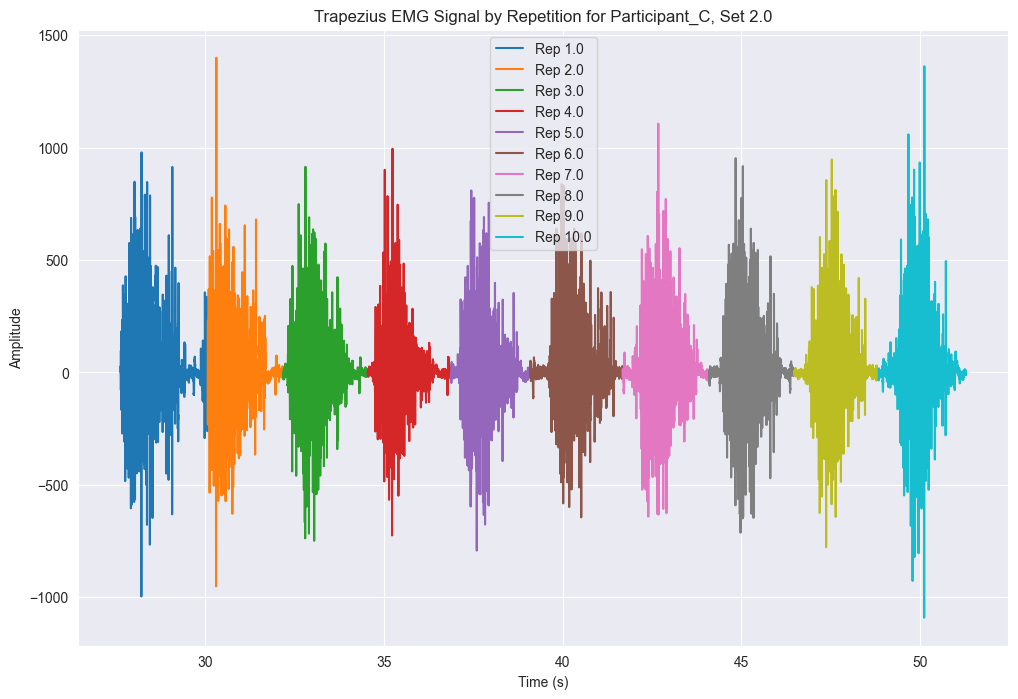

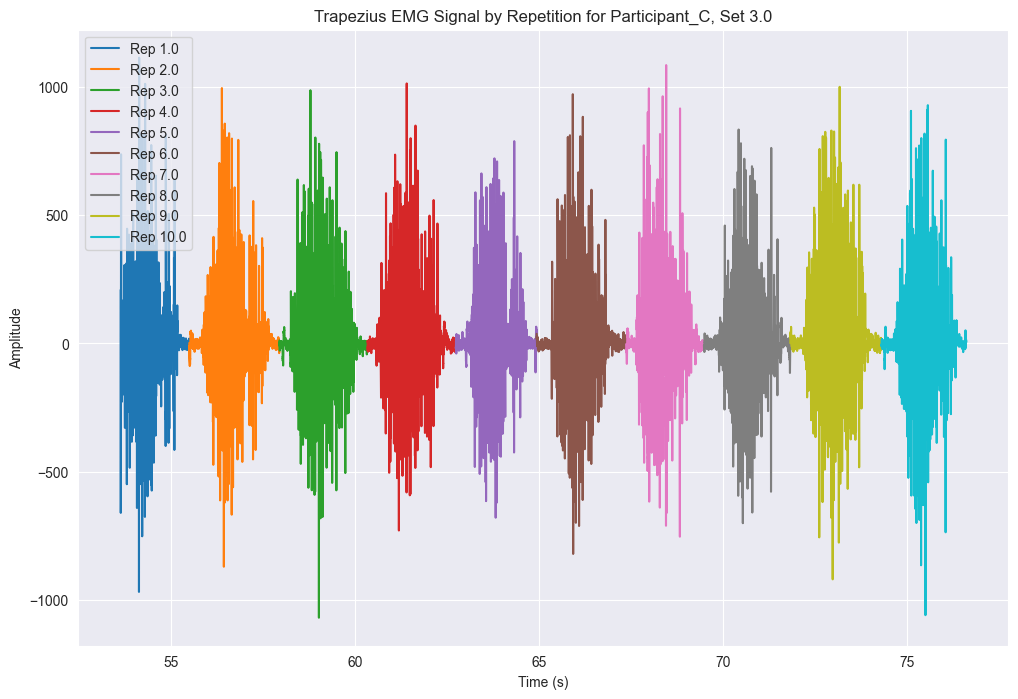

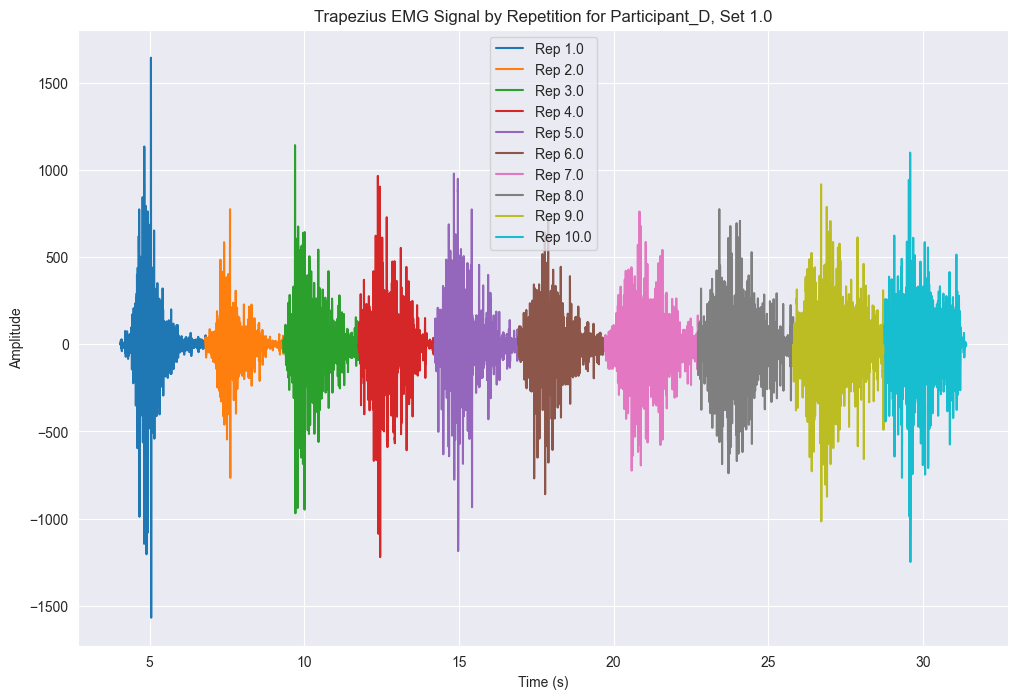

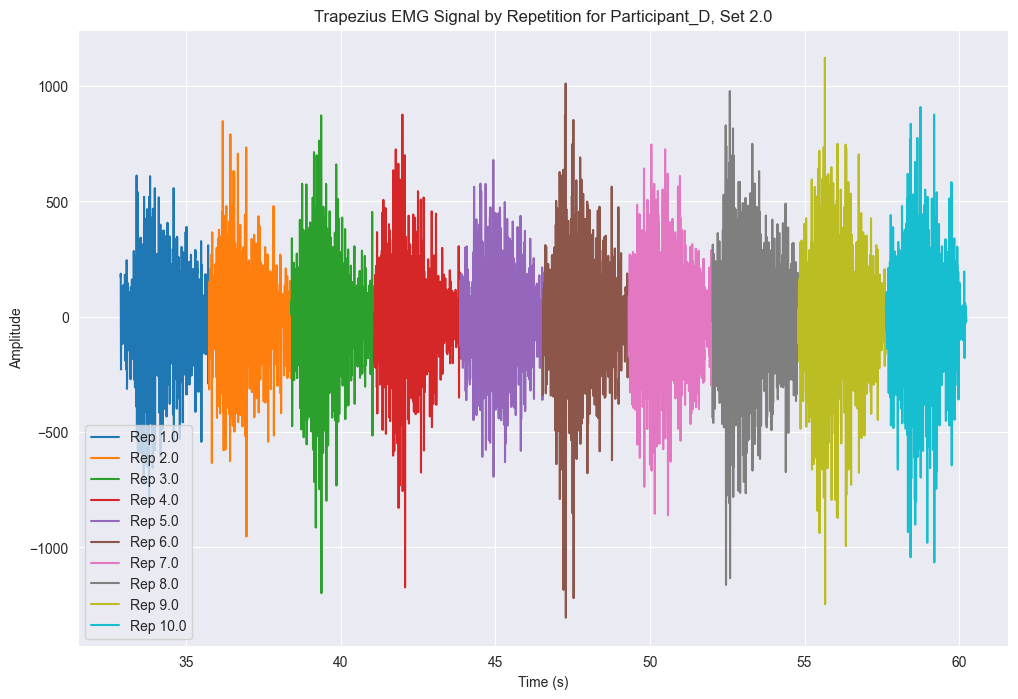

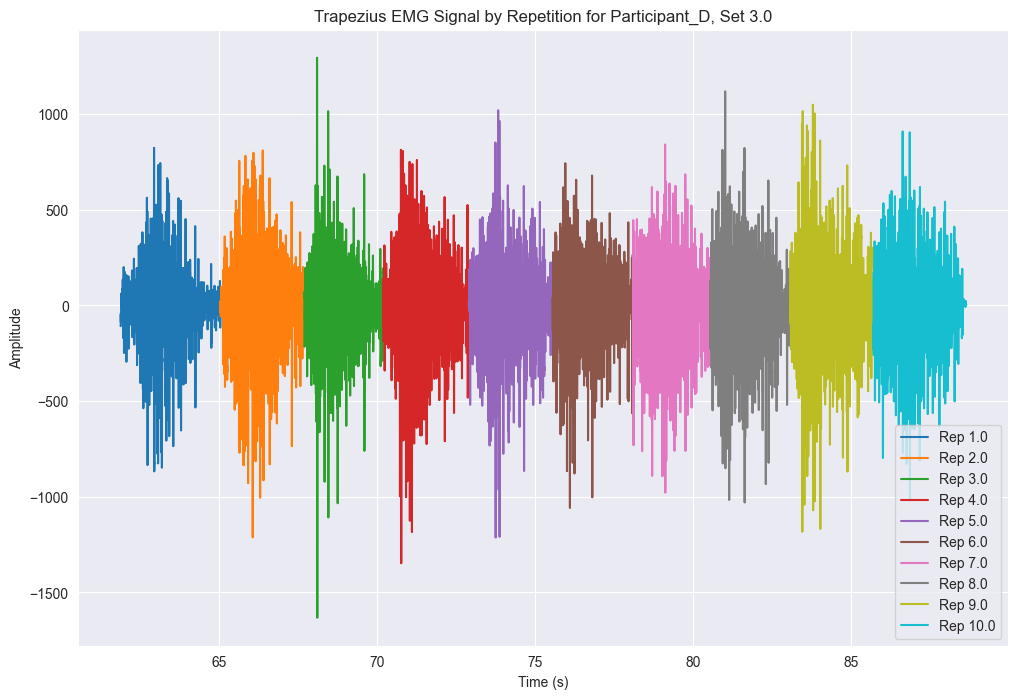

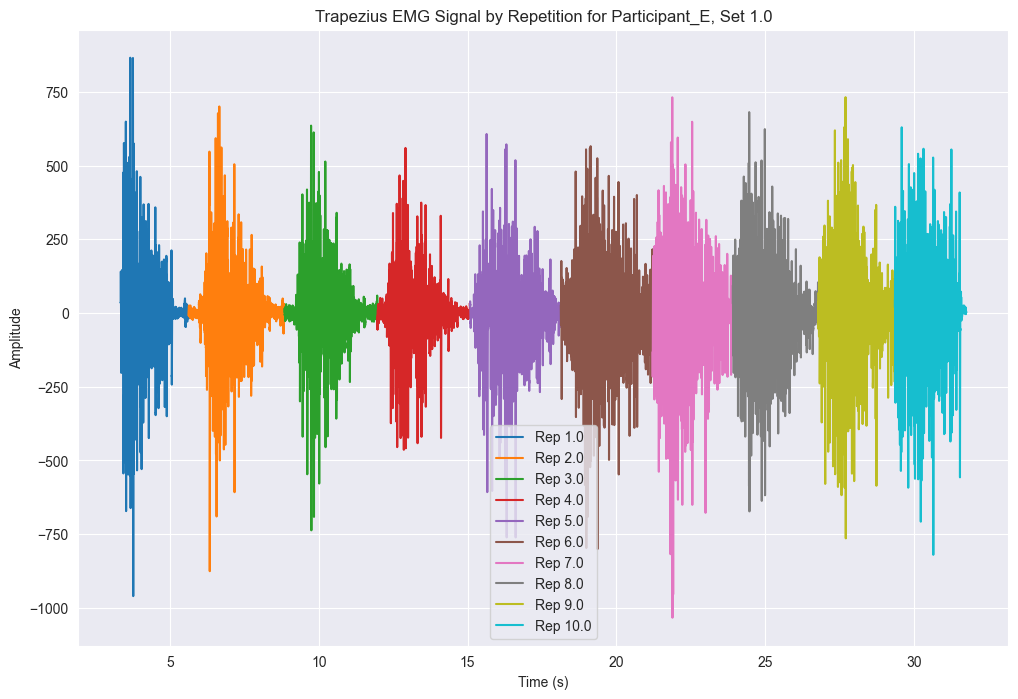

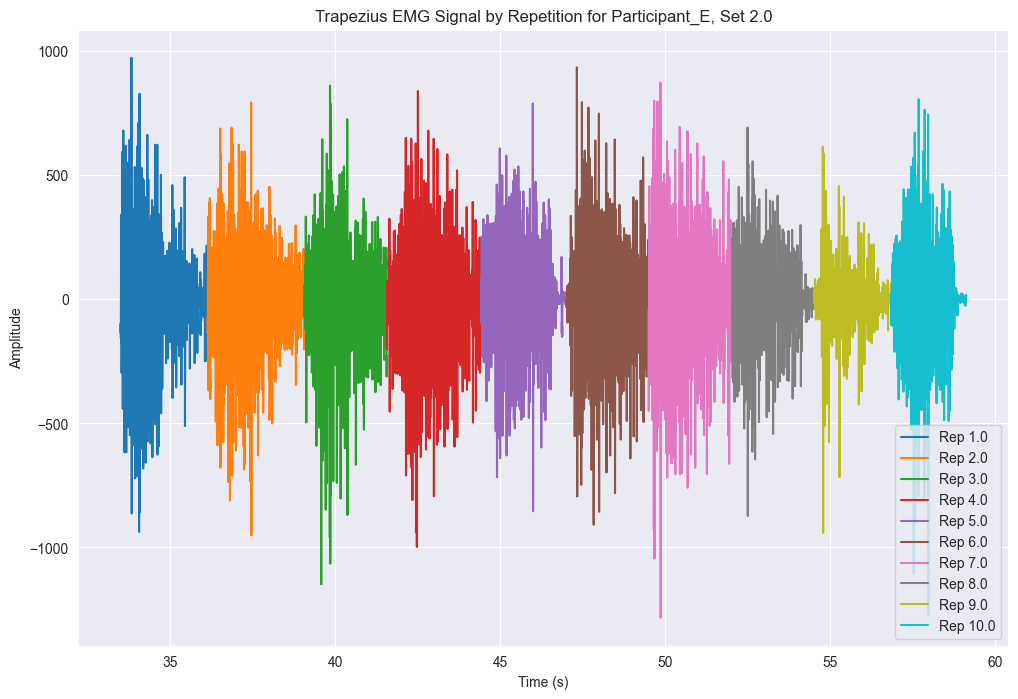

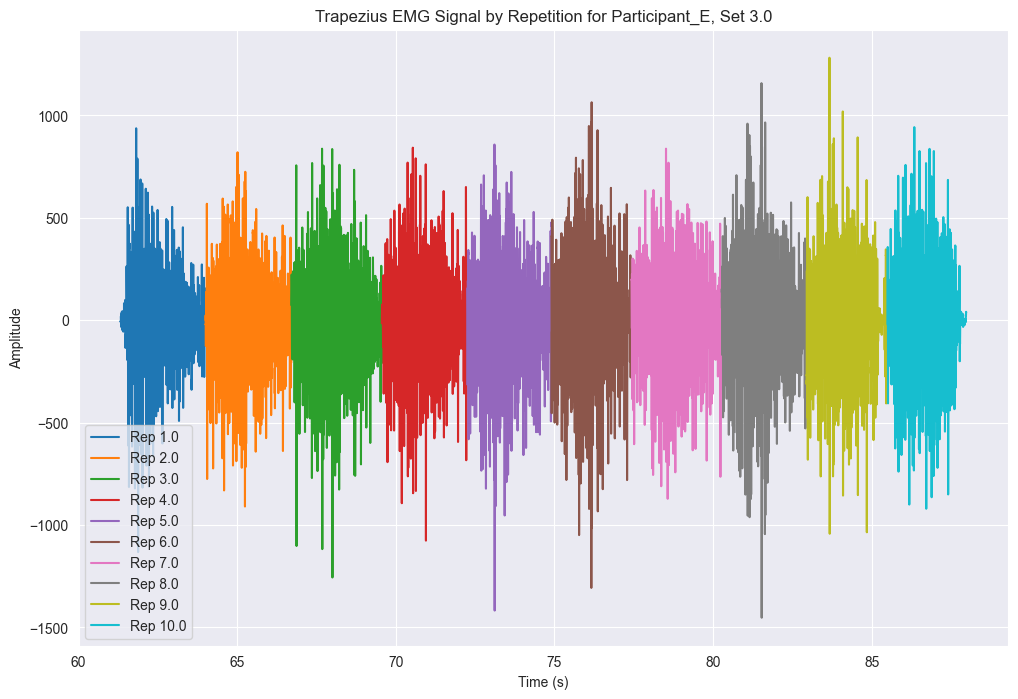

In [3]:
def plot_all_reps(df, column_name='trapezius'):
    unique_participants = df['Participant'].unique()
    unique_sets = np.sort(df['Set'].unique())

    for participant in unique_participants:
        for set_num in unique_sets:
            d = df[(df['Participant'] == participant) & (df['Set'] == set_num)]
            if d.empty:
                continue

            unique_reps = np.sort(d['Repetition'].unique())
            plt.figure(figsize=(12, 8))

            for rep in unique_reps:
                rep_data = d[d['Repetition'] == rep]
                plt.plot(rep_data['Time'], rep_data[column_name], label=f'Rep {rep}')

            plt.title(f'{column_name.capitalize()} EMG Signal by Repetition for {participant}, Set {set_num}')
            plt.xlabel('Time (s)')
            plt.ylabel('Amplitude')
            plt.legend()
            plt.grid(True)
            plt.show()


plot_all_reps(emg, column_name='trapezius')